In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [46]:
print(os.getcwd())
# inorder to change directory for direct upload
#os.chdir(C:\Users\harsh\OneDrive\Documents\ML"")

C:\Users\harsh


In [47]:
df=pd.read_csv('Supervised.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [48]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [49]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


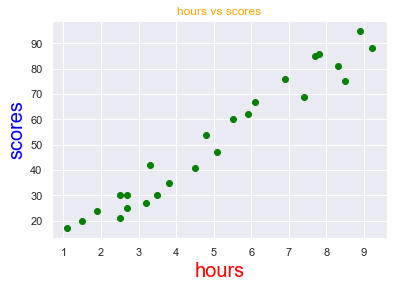

In [51]:
x=df['Hours']
y=df['Scores']
plt.scatter(x,y,color='green')  
plt.title('hours vs scores',color='orange')
plt.xlabel('hours',fontsize=20,color='red')
plt.ylabel('scores',fontsize=20,color='blue')
plt.show()

In [52]:
z=sm.add_constant(x)
results=sm.OLS(y,z).fit()  
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           9.13e-17
Time:                        12:46:12   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

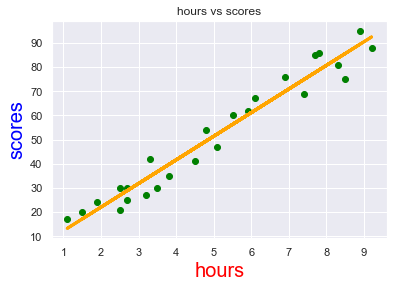

In [53]:
plt.scatter(x,y,color='green')  
yhat=9.7758*x+2.4837
plt.plot(x,yhat,lw=3,label='line of best fit',color='orange')
plt.title('hours vs scores')
plt.xlabel('hours',fontsize=20,color='red')
plt.ylabel('scores',fontsize=20,color='blue')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
x=df[['Hours']]
y=df[['Scores']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [55]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(x_train, y_train) 

print("Training complete.")

Training complete.


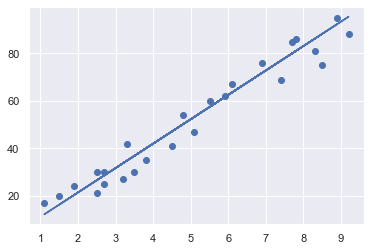

In [56]:
line = regr.coef_*x+regr.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [57]:
print(x_test) # Testing data - In Hours
y_pred = regr.predict(x_test)

    Hours
22    3.8
13    3.3
3     8.5
18    6.1
19    7.4
8     8.3
23    6.9
1     5.1


In [58]:
print(regr.intercept_)
print(regr.coef_)

[0.85362348]
[[10.28311463]]


In [59]:
print(x_test) 
y_pred = regr.predict(x_test)

    Hours
22    3.8
13    3.3
3     8.5
18    6.1
19    7.4
8     8.3
23    6.9
1     5.1


In [60]:
y_pred

array([[39.9294591 ],
       [34.78790178],
       [88.26009788],
       [63.58062276],
       [76.94867178],
       [86.20347495],
       [71.80711446],
       [53.29750812]])

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
pred_train = regr.predict(x_train)
train_set_rmse = (np.sqrt(mean_squared_error(y_train, pred_train)))
train_set_rmse

4.671187380049009

In [64]:
pred_test = regr.predict(x_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred_test)))
test_set_rmse

7.170536038101183

In [65]:
pred_test

array([[39.9294591 ],
       [34.78790178],
       [88.26009788],
       [63.58062276],
       [76.94867178],
       [86.20347495],
       [71.80711446],
       [53.29750812]])

In [66]:
print('no.of Hours: 9.25')
print('scores: ',regr.predict([[9.25]]))

no.of Hours: 9.25
scores:  [[95.97243386]]


In [67]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.557946604120373
